#Importing libraries

In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing

##Training Image preprocessing

In [38]:
training_set = tf.keras.utils.image_dataset_from_directory(
   'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


##Validation Image Preprocessing

In [39]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Building Model

In [40]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [41]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [42]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [43]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [44]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [45]:
cnn.add(tf.keras.layers.Flatten())

In [46]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [47]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [48]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [49]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase

In [50]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [51]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        36928     
                                                      

In [52]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 36s 334ms/step - loss: 9.6158 - accuracy: 0.0263 - val_loss: 3.5833 - val_accuracy: 0.0285
Epoch 2/32
98/98 [==============================] - 32s 314ms/step - loss: 3.5819 - accuracy: 0.0273 - val_loss: 3.5791 - val_accuracy: 0.0285
Epoch 3/32
98/98 [==============================] - 32s 314ms/step - loss: 3.5724 - accuracy: 0.0350 - val_loss: 3.5551 - val_accuracy: 0.0399
Epoch 4/32
98/98 [==============================] - 33s 315ms/step - loss: 3.5363 - accuracy: 0.0491 - val_loss: 3.5520 - val_accuracy: 0.0370
Epoch 5/32
98/98 [==============================] - 33s 315ms/step - loss: 3.4781 - accuracy: 0.0568 - val_loss: 3.3248 - val_accuracy: 0.1311
Epoch 6/32
98/98 [==============================] - 37s 358ms/step - loss: 3.3818 - accuracy: 0.0735 - val_loss: 3.4059 - val_accuracy: 0.1168
Epoch 7/32
98/98 [==============================] - 33s 315ms/step - loss: 3.3016 - accuracy: 0.0931 - val_loss: 3.0420 - val_accuracy: 0.1795

##Evaluating Model

In [53]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 [==============================] - 20s 188ms/step - loss: 0.2121 - accuracy: 0.9448
Training accuracy: 0.9447833299636841


In [54]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 [==============================] - 3s 50ms/step - loss: 0.5223 - accuracy: 0.9288
Validation accuracy: 0.9287749528884888


##Saving Model

In [55]:
cnn.save('trained_model.h5')

In [56]:
# Save the model
model_filename = 'trained_model.keras'
cnn.save(model_filename)

In [57]:
# Save the model
model_filename = 'trained_model.h5'
cnn.save(model_filename)

In [58]:
training_history.history #Return Dictionary of history

{'loss': [9.6158447265625,
  3.581859827041626,
  3.5723843574523926,
  3.53631591796875,
  3.478114366531372,
  3.381798028945923,
  3.3015706539154053,
  3.2022864818573,
  3.083341121673584,
  2.942261219024658,
  2.8504364490509033,
  2.717622756958008,
  2.5719339847564697,
  2.346268892288208,
  2.1907479763031006,
  2.0005640983581543,
  1.8037711381912231,
  1.6465953588485718,
  1.5643211603164673,
  1.3611818552017212,
  1.2689279317855835,
  1.169715166091919,
  1.0408004522323608,
  0.9895830750465393,
  0.9514073729515076,
  0.8180488348007202,
  0.7972294092178345,
  0.696528971195221,
  0.6073046326637268,
  0.606990396976471,
  0.6038849949836731,
  0.5465083718299866],
 'accuracy': [0.026324236765503883,
  0.0272873193025589,
  0.034991975873708725,
  0.04911717399954796,
  0.056821830570697784,
  0.07351525127887726,
  0.09309791028499603,
  0.11332263052463531,
  0.14414125680923462,
  0.17174959182739258,
  0.19967897236347198,
  0.24205458164215088,
  0.26773676276

In [59]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [60]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##Calculating Accuracy of Model Achieved on Validation set

In [61]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 92.87749528884888 %


#Accuracy Visualization

##Training Visualization

In [62]:
#training_history.history['accuracy']

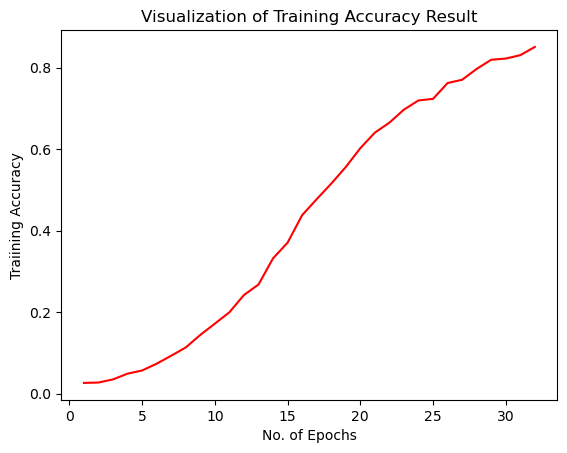

In [63]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy

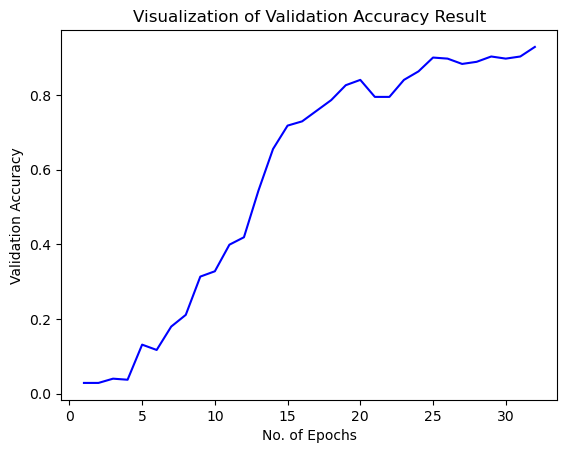

In [64]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

##Test set Evaluation

In [65]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [66]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 [==============================] - 3s 66ms/step - loss: 0.5108 - accuracy: 0.9304
Test accuracy: 0.9303621053695679
